# **Without data augumentation**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

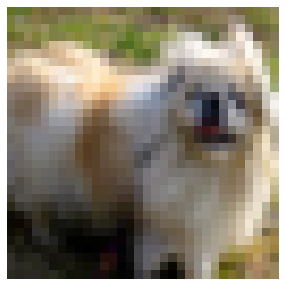

In [ ]:
fig = plt.figure(figsize=(10,5))
img = x_train[40]
plt.axis('off')
plt.imshow(img)
plt.show()

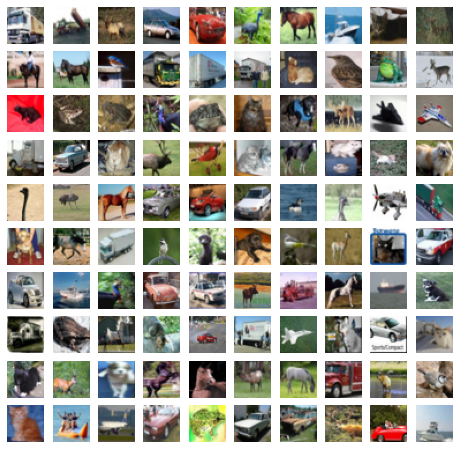

In [ ]:
fig = plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = x_train[i]
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img)
plt.show()

http://parneetk.github.io/blog/cnn-cifar10/

In [ ]:
# class_names = ['airplane','automobile','bird','cat','deer',
#                'dog','frog','horse','ship','truck']
# fig = plt.figure(figsize=(8,3))
# num_classes = len(np.unique(y_train))
# for i in range(num_classes):
#     ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
#     idx = np.where(y_train[:]==i)[0]
#     features_idx = x_train[idx,::]
#     img_num = np.random.randint(features_idx.shape[0])
#     im = np.transpose(features_idx[img_num,::], (1, 2, 0))
#     ax.set_title(class_names[i])
#     plt.imshow(im)
# plt.show()

In [ ]:
print(x_train.max())
print(x_test.max())

255
255


In [ ]:
# x_train = train.astype('float32')
# x_test = test.astype('float32')

In [ ]:
x_train = x_train/225
x_test = x_test/255

In [ ]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test,10)

In [ ]:
# model = Sequential()
# model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(3, 32, 32)))
# model.add(Activation('relu'))
# model.add(Convolution2D(48, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Convolution2D(96, 3, 3, border_mode='same'))
# model.add(Activation('relu'))
# model.add(Convolution2D(96, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Convolution2D(192, 3, 3, border_mode='same'))
# model.add(Activation('relu'))
# model.add(Convolution2D(192, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(256))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [ ]:
# start = time.time()
# model_info = model.fit(train_features, train_labels, 
#                        batch_size=128, nb_epoch=200, 
#                        validation_data = (test_features, test_labels), 
#                        verbose=0)
# end = time.time()
# plot_model_history(model_info)
# print "Model took %0.2f seconds to train"%(end - start)
# print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model)

In [ ]:
model.fit(x_train,y_cat_train,batch_size=128,epochs=20,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/20
391/391 [==============================] - 48s 120ms/step - loss: 2.0882 - accuracy: 0.2055 - val_loss: 1.5361 - val_accuracy: 0.4529
Epoch 2/20
391/391 [==============================] - 46s 118ms/step - loss: 1.5698 - accuracy: 0.4237 - val_loss: 1.3527 - val_accuracy: 0.5145
Epoch 3/20
391/391 [==============================] - 46s 119ms/step - loss: 1.3992 - accuracy: 0.4992 - val_loss: 1.2402 - val_accuracy: 0.5607
Epoch 4/20
391/391 [==============================] - 46s 118ms/step - loss: 1.2999 - accuracy: 0.5395 - val_loss: 1.2047 - val_accuracy: 0.5841
Epoch 5/20
391/391 [==============================] - 46s 118ms/step - loss: 1.2095 - accuracy: 0.5811 - val_loss: 1.1950 - val_accuracy: 0.5790
Epoch 6/20
391/391 [==============================] - 46s 118ms/step - loss: 1.1439 - accuracy: 0.6074 - val_loss: 1.1457 - val_accuracy: 0.6086
Epoch 7/20
391/391 [==============================] - 46s 119ms/step - loss: 1.0945 - accuracy: 0.6233 - val_loss: 1.0722 - val_ac

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(zoom_range=0.2,horizontal_flip=True)

# start = time.time()
# # Train the model
# model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
#                                  samples_per_epoch = train_features.shape[0], nb_epoch = 200, 
#                                  validation_data = (test_features, test_labels), verbose=0)
# end = time.time()
# print "Model took %0.2f seconds to train"%(end - start)
# # plot model history
# plot_model_history(model_info)
# # compute test accuracy
# print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model)

In [ ]:
losses = pd.DataFrame(model.history.history)

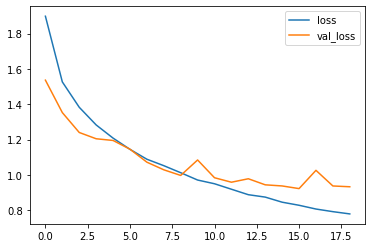

In [ ]:
losses[['loss','val_loss']].plot()

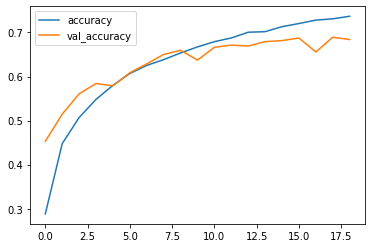

In [ ]:
losses[['accuracy','val_accuracy']].plot()

In [ ]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.9331421852111816, 0.683899998664856]


In [ ]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.70      0.72      1000
           1       0.81      0.83      0.82      1000
           2       0.59      0.57      0.58      1000
           3       0.46      0.55      0.50      1000
           4       0.57      0.70      0.63      1000
           5       0.71      0.44      0.54      1000
           6       0.68      0.83      0.75      1000
           7       0.80      0.70      0.75      1000
           8       0.77      0.81      0.79      1000
           9       0.84      0.71      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [ ]:
confusion_matrix(y_test,predictions)

array([[700,  21,  74,  26,  30,   2,  13,  14, 100,  20],
       [ 23, 830,  12,   8,   2,   3,  27,   4,  40,  51],
       [ 57,   9, 569,  79, 118,  49,  80,  21,  10,   8],
       [ 14,  13,  76, 549, 113,  72, 106,  33,  13,  11],
       [ 21,   2,  61,  70, 700,   5,  76,  48,  15,   2],
       [ 12,   7,  71, 295,  80, 438,  44,  44,   5,   4],
       [  5,   0,  46,  61,  43,   8, 827,   4,   4,   2],
       [ 18,   4,  32,  60, 111,  36,  19, 705,   1,  14],
       [ 66,  29,  17,  30,  12,   3,  14,   0, 810,  19],
       [ 41, 111,  11,  26,  11,   5,  13,  13,  58, 711]])

In [ ]:
classes = [0,1,2,3,4,5,6,7,8,9]
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
d = dict(zip(classes, class_names))

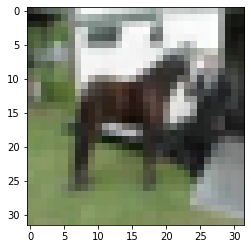

In [ ]:
my_image = x_test[20]

plt.imshow(my_image)

In [ ]:
input_img = my_image.reshape(1,32,32,3)

predictions = np.argmax(model.predict(input_img), axis=-1)[0]

print(f"True class: {d[y_test[20][0]]} \n\nPredicted class: {d[predictions]}")

True class: horse 

Predicted class: horse


In [ ]:
# def unpickle(file):
#     import pickle
#     with open(file, 'rb') as fo:
#         dict = pickle.load(fo, encoding='bytes')
#     return dict

data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.

labels -- a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.

label_names -- a 10-element list which gives meaningful names to the numeric labels in the labels array described above. For example, label_names[0] == "airplane", label_names[1] == "automobile", etc.


# **With data augumentation**

Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing Dataset

In [ ]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

Pre-Preocessing

In [ ]:
X_train = np.asarray(X_train, dtype=float)/255
X_test = np.asarray(X_test, dtype=float)/255

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
print("Number of train images: ", X_train.shape[0])
print("Number of test images: ", X_test.shape[0])

Number of train images:  50000
Number of test images:  10000


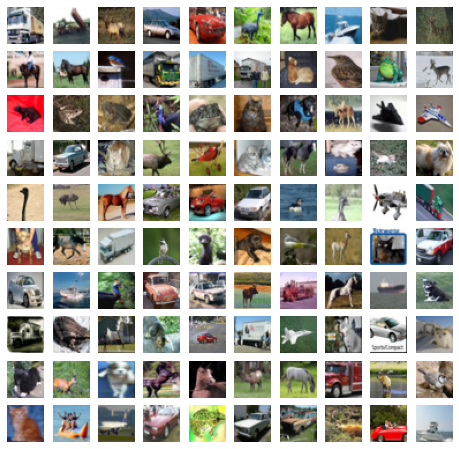

In [ ]:
fig = plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = X_train[i]
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img)
plt.show()

Build Model

In [ ]:
from tensorflow import keras

# Model architecture
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, datasets,models,layers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import MaxPooling2D, DepthwiseConv2D, BatchNormalization
from tensorflow.keras.models import load_model

# Data processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [ ]:
labels = []
for i in y_train:
  labels.append(i[0])
print(labels)

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 3, 9, 0, 7, 9, 7, 7, 9, 1, 5, 1, 6, 6, 8, 7, 1, 3, 0, 

In [ ]:
labels_df = pd.DataFrame(labels, columns=["labels"])
labels_df

,labels
0,6
1,9
2,9
3,4
4,1
...,...
49995,2
49996,6
49997,9
49998,1


In [ ]:
classes = list(set(labels))
classes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
number_of_classes = len(classes)
number_of_classes

10

In [ ]:
labels_dict =  {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}
labels_dict_reversed = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

In [ ]:
labels_categories = keras.utils.to_categorical(labels_df["labels"], number_of_classes)

In [ ]:
labels_categories

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Splitting the training data into train set and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, labels_categories, random_state=0, test_size=0.05)

In [ ]:
print(X_train.shape)
print(X_val.shape)

(47500, 32, 32, 3)
(2500, 32, 32, 3)


Data Augmentation

In [ ]:
# Data augumetation
datagen = ImageDataGenerator(
        rotation_range=0.3,  
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1,
        horizontal_flip=True)

Model

In [ ]:
model_layers = [
    Conv2D(32, (3, 3), activation='relu', strides=(1,1), padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation=keras.activations.relu, depth_multiplier=3),
#     MaxPooling2D(2, 2),
    Dropout(rate =0.1),
    
    
    Conv2D(64, (3, 3), activation='relu', strides=(2, 2), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation=keras.activations.relu),
#     MaxPooling2D(2, 2),
    Dropout(rate = 0.1),
    
    Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation=keras.activations.relu),
#     MaxPooling2D(2, 2),
    Dropout(rate = 0.4),
    
    Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(1,1), strides=(1, 1), padding='same', activation=keras.activations.relu),
    
    
    Conv2D(256, (3, 3), activation='relu', strides=(2, 2), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation=keras.activations.relu),
    
    
    
    Conv2D(512, (1, 1), activation='relu', strides=(2, 2), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(1,1), strides=(1, 1), padding='same', activation=keras.activations.relu),
    
#     MaxPooling2D(2, 2),
    Dropout(rate = 0.4),
    
    Flatten(),
    Dropout(rate = 0.3),
    Dense(2048, activation='relu'),
    Dropout(rate = 0.3),
    Dense(512, activation='relu'),
    Dropout(rate = 0.4),
    Dense(10, activation='softmax')
] 
model = Sequential(model_layers)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
depthwise_conv2d (DepthwiseC (None, 32, 32, 96)        960       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        55360     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
depthwise_conv2d_1 (Depthwis (None, 16, 16, 64)        6

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

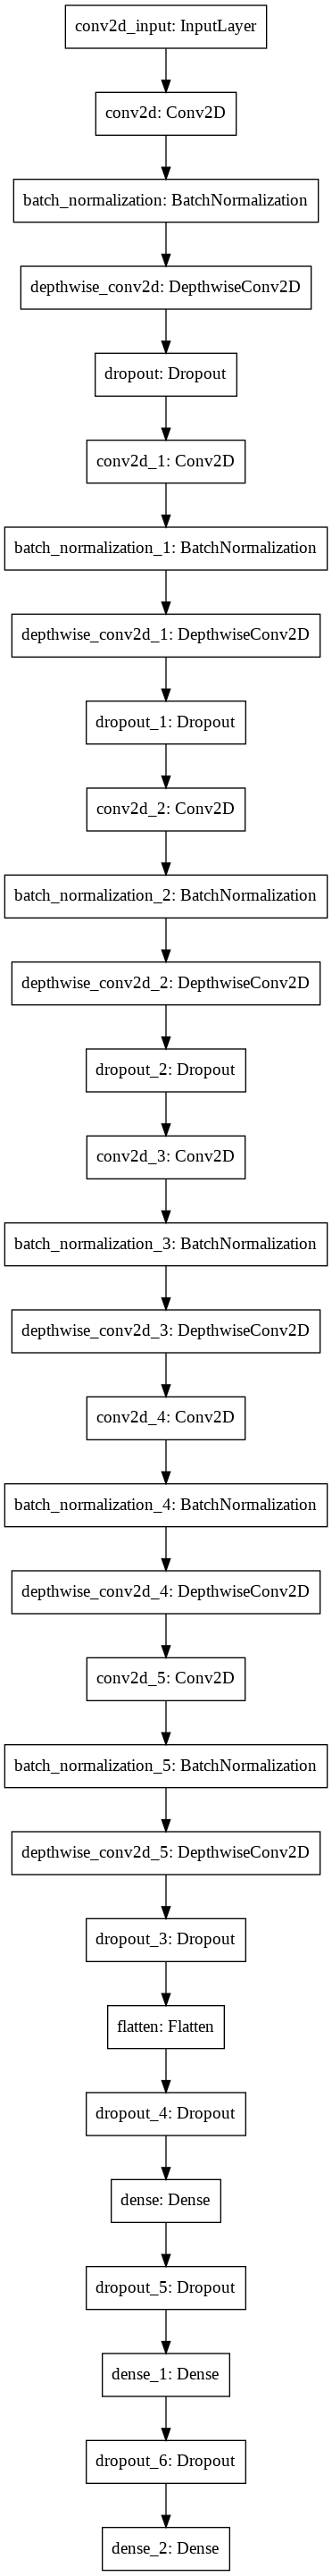

In [ ]:
# Visualization of the model
keras.utils.plot_model(model)

In [ ]:
mcp_save = ModelCheckpoint('/content/best_model', save_best_only=True, monitor='val_accuracy', mode='max')

In [ ]:
num_of_epochs = 10
batch_size = 64 

In [ ]:
model.fit(datagen.flow(X_train, y_train, batch_size=batch_size), validation_data=(X_val, y_val), callbacks=[mcp_save], epochs=num_of_epochs)

Epoch 1/10
743/743 [==============================] - 1110s 1s/step - loss: 0.7665 - accuracy: 0.7355 - val_loss: 0.7063 - val_accuracy: 0.7576
INFO:tensorflow:Assets written to: /content/best_model/assets
Epoch 2/10
743/743 [==============================] - 1103s 1s/step - loss: 0.7229 - accuracy: 0.7522 - val_loss: 0.7920 - val_accuracy: 0.7296
Epoch 3/10
743/743 [==============================] - 1100s 1s/step - loss: 0.6947 - accuracy: 0.7641 - val_loss: 0.6809 - val_accuracy: 0.7632
INFO:tensorflow:Assets written to: /content/best_model/assets
Epoch 4/10
743/743 [==============================] - 1112s 1s/step - loss: 0.6737 - accuracy: 0.7685 - val_loss: 0.8563 - val_accuracy: 0.7216
Epoch 5/10
743/743 [==============================] - 1105s 1s/step - loss: 0.6385 - accuracy: 0.7814 - val_loss: 0.6065 - val_accuracy: 0.7940
INFO:tensorflow:Assets written to: /content/best_model/assets
Epoch 6/10
743/743 [==============================] - 1104s 1s/step - loss: 0.6277 - accuracy:

In [ ]:
print(model.metrics_names)
print(model.evaluate(X_val,y_val,verbose=0))

['loss', 'accuracy']
[0.5847573280334473, 0.803600013256073]


In [ ]:
model_ = load_model('/content/best_model', compile=False)

In [ ]:
test_predictions = model_.predict_classes(X_test)
test_predictions

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
accuracy = accuracy_score(test_predictions, y_test)
print(accuracy)

0.8209


# **Random forest**

Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing Dataset

In [ ]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
X_train=X_train.reshape(50000,3072)
X_test=X_test.reshape(10000,3072)
y_train = y_train.flatten()
y_test = y_test.flatten()
# y_train=y_train.reshape(50000,3072)
# y_test=y_test.reshape(10000,3072)

Pre-Preocessing

In [ ]:
X_train = np.asarray(X_train, dtype=float)/255
X_test = np.asarray(X_test, dtype=float)/255
y_train = y_train.flatten()
y_test = y_test.flatten()

In [ ]:
X_test.shape

(10000, 3072)

In [ ]:
print("Number of train images: ", X_train.shape[0])
print("Number of test images: ", X_test.shape[0])

Number of train images:  50000
Number of test images:  10000


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# clf_rdf=RandomForestClassifier()
parameters = {'n_estimators':[10,50,100]}
clf_GS_rdf= GridSearchCV(RandomForestClassifier(), parameters)
clf_GS_rdf.fit(X_train,y_train)
clf_GS_rdf.best_params_

{'n_estimators': 100}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score 
model = RandomForestClassifier(n_estimators = 100)
cv_results = cross_val_score(model, X_train, y_train,cv = 5, scoring='accuracy', n_jobs = -1, verbose = 1)  
model.fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 12.9min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn import metrics
print(cv_results.mean()*100)
predicted_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_y))

45.746
              precision    recall  f1-score   support

           0       0.54      0.56      0.55      1000
           1       0.52      0.54      0.53      1000
           2       0.37      0.33      0.35      1000
           3       0.34      0.29      0.31      1000
           4       0.40      0.39      0.39      1000
           5       0.42      0.39      0.40      1000
           6       0.46      0.56      0.50      1000
           7       0.51      0.44      0.47      1000
           8       0.58      0.61      0.59      1000
           9       0.49      0.55      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.46      0.47      0.46     10000
weighted avg       0.46      0.47      0.46     10000



# **MLP**

Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing Dataset

In [ ]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
X_train=X_train.reshape(50000,3072)
X_test=X_test.reshape(10000,3072)
y_train = y_train.flatten()
y_test = y_test.flatten()
# y_train=y_train.reshape(50000,3072)
# y_test=y_test.reshape(10000,3072)

Pre-Preocessing

In [ ]:
X_train = np.asarray(X_train, dtype=float)/255
X_test = np.asarray(X_test, dtype=float)/255
y_train = y_train.flatten()
y_test = y_test.flatten()

In [ ]:
X_test.shape

(10000, 3072)

In [ ]:
print("Number of train images: ", X_train.shape[0])
print("Number of test images: ", X_test.shape[0])

Number of train images:  50000
Number of test images:  10000


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (100,)],
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.05]
}
clf = MLPClassifier(max_iter = 300,random_state=42)
# clf.fit(X_train,y_train.values.ravel())
clf_GS_mlp = GridSearchCV(clf, parameter_space, cv=2)
clf_GS_mlp.fit(X_train, y_train)
clf_GS_mlp.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
from sklearn.model_selection import cross_val_score 
model_f= MLPClassifier(max_iter = 300,random_state=42)
cv_results_f = cross_val_score(model, X_train, y_train,cv = 5, scoring='accuracy', n_jobs = -1, verbose = 1)  
model_f.fit(X_train, y_train)

In [ ]:
from sklearn import metrics
print(cv_results_f.mean()*100)
predicted_y_f = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_y_f))